sampling freq: 100.0


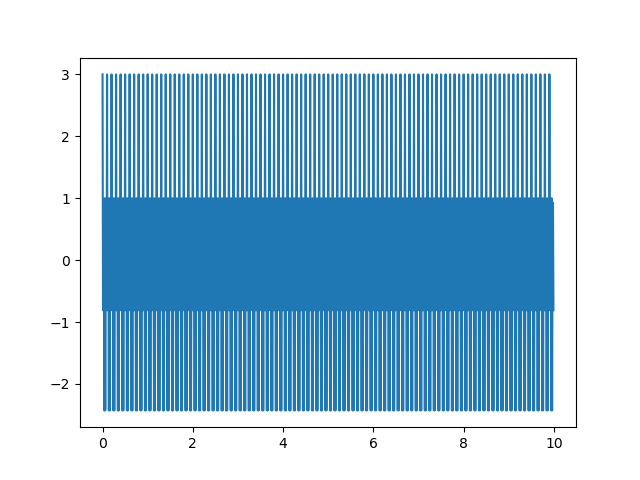

In [1]:
%matplotlib widget
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

plt.close("all")

dt1 = 0.01
fs1 = 1/dt1
n1 = np.arange(0, 10, dt1)
len1 = len(n1)

print("sampling freq:", fs1)

x1 = np.cos(10*2*np.pi*n1) + 2 * np.cos(40*2*np.pi*n1)

plt.figure()
plt.plot(n1, x1)
plt.show()

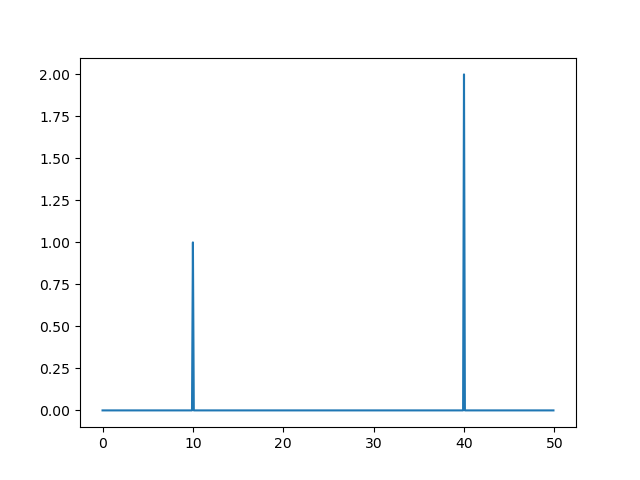

In [2]:
fft1 = sp.fft.fft(x1)
fft1 = np.abs(fft1)[:len1//2]

xf1 = sp.fft.fftfreq(len1, dt1)[:len1//2]

plt.figure()
plt.plot(xf1, 2/len1 * fft1)
plt.show()

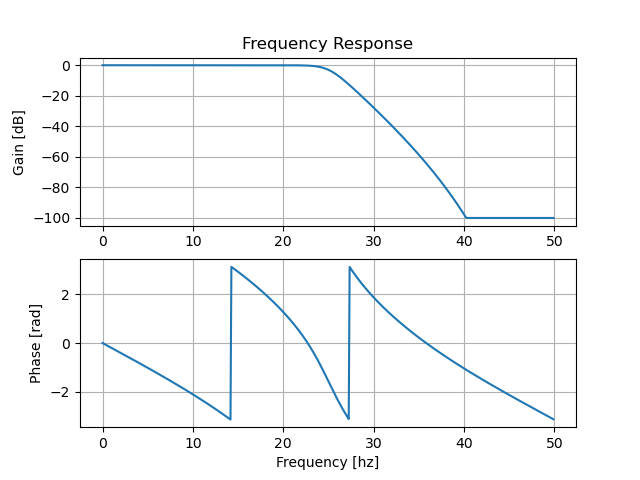

In [3]:
sos = sp.signal.butter(10, 25, "low", fs=fs1, output="sos")
w, h = sp.signal.sosfreqz(sos, fs=fs1)

db = 20*np.log10(np.maximum(np.abs(h), 1e-5))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(w, db)
plt.grid(True)
plt.ylabel('Gain [dB]')
plt.title('Frequency Response')

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h))
plt.grid(True)
plt.ylabel('Phase [rad]')
plt.xlabel('Frequency [hz]')
plt.show()

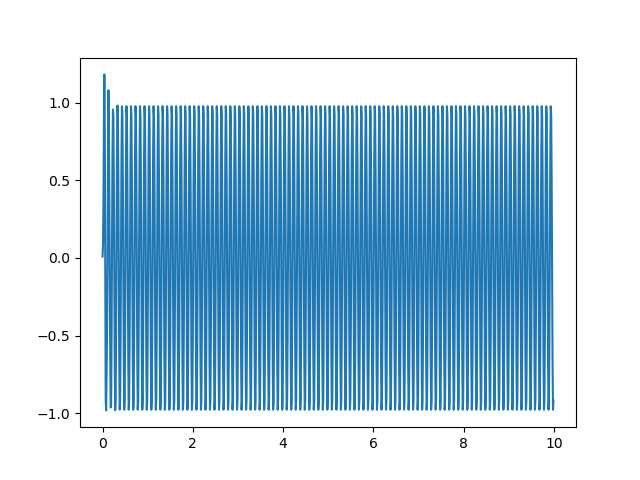

In [4]:
filtered1 = sp.signal.sosfilt(sos, x1)

plt.figure()
plt.plot(n1, filtered1)
plt.show()

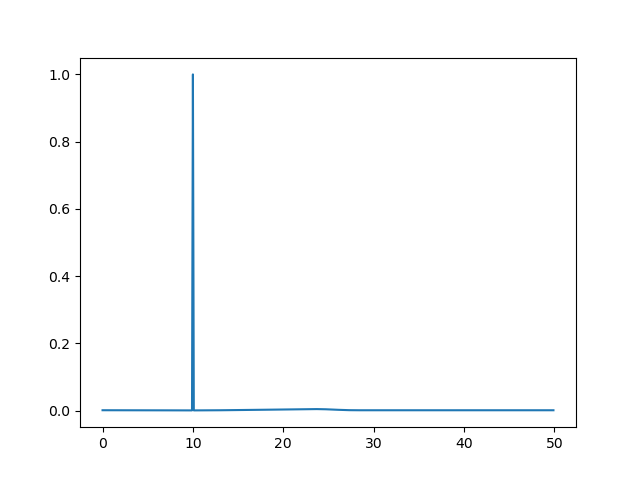

In [5]:
fft1 = sp.fft.fft(filtered1)
fft1 = np.abs(fft1)[:len1//2]

xf1 = sp.fft.fftfreq(len1, dt1)[:len1//2]

plt.figure()
plt.plot(xf1, 2/len1 * fft1)
plt.show()